# Life Expectancy Project
Azhar Rahadian - TU Braunschweig Student

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 1. Load Data

In [2]:
data = pd.read_csv('life_expectancy.csv')

In [3]:
data.head(10)

,Unnamed: 0,Country,Country Code,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
0,0,Abkhazia,OWID_ABK,2015,66.168444,61.202554,2.131189e+07,-4.96589
1,1,Afghanistan,AFG,1950,28.400000,27.100000,7.480464e+06,-1.30000
2,2,Afghanistan,AFG,1951,28.600000,27.400000,7.571542e+06,-1.20000
3,3,Afghanistan,AFG,1952,29.100000,27.800000,7.667534e+06,-1.30000
4,4,Afghanistan,AFG,1953,29.600000,28.300000,7.764549e+06,-1.30000
5,5,Afghanistan,AFG,1954,29.900000,28.600000,7.864289e+06,-1.30000
6,6,Afghanistan,AFG,1955,30.600000,29.300000,7.971933e+06,-1.30000
7,7,Afghanistan,AFG,1956,31.200000,29.700000,8.087730e+06,-1.50000
8,8,Afghanistan,AFG,1957,31.700000,30.300000,8.210207e+06,-1.40000
9,9,Afghanistan,AFG,1958,32.200000,30.800000,8.333827e+06,-1.40000


In [4]:
data.describe()

,Unnamed: 0,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
count,17003.000000,17003.000000,17003.000000,17003.000000,1.700300e+04,17003.000000
mean,9133.030171,1985.519085,66.168444,61.202554,2.131189e+07,-4.965890
std,5340.684374,20.790029,12.521956,11.578585,9.442073e+07,2.390082
min,0.000000,1950.000000,12.700000,10.100000,1.363000e+03,-29.500000
25%,4401.500000,1968.000000,57.800000,53.700000,2.390965e+05,-6.300000
50%,9019.000000,1986.000000,69.200000,63.600000,3.245066e+06,-4.800000
75%,13852.500000,2004.000000,75.900000,69.900000,1.103752e+07,-3.400000
max,18407.000000,2021.000000,88.700000,84.800000,1.425894e+09,9.900000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17003 entries, 0 to 17002
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              17003 non-null  int64  
 1   Country                 17003 non-null  object 
 2   Country Code            17003 non-null  object 
 3   Year                    17003 non-null  int64  
 4   Female Life Expectancy  17003 non-null  float64
 5   Male Life Expectancy    17003 non-null  float64
 6   Population              17003 non-null  float64
 7   Life Expectancy Gap     17003 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.0+ MB


In [6]:
data.shape

(17003, 8)

In [7]:
# 17003 rows and 7 columns

### LOAD GDP DATA

In [8]:
data_gdp = pd.read_csv('gdp_cleaned_dataset')

In [9]:
data_gdp.head()

,Unnamed: 0,Country Code,Country,Year,gdppc,pop
0,0,AFG,Afghanistan,1950,1156.0,8150.0
1,1,AFG,Afghanistan,1951,1170.0,8284.0
2,2,AFG,Afghanistan,1952,1189.0,8425.0
3,3,AFG,Afghanistan,1953,1240.0,8573.0
4,4,AFG,Afghanistan,1954,1245.0,8728.0


## 2. Clean up data

In [10]:
data = data.drop(axis=1, columns=data.columns[0])

In [11]:
data.isna().sum()

Country                   0
Country Code              0
Year                      0
Female Life Expectancy    0
Male Life Expectancy      0
Population                0
Life Expectancy Gap       0
dtype: int64

In [12]:
data.head()

,Country,Country Code,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
0,Abkhazia,OWID_ABK,2015,66.168444,61.202554,2.131189e+07,-4.96589
1,Afghanistan,AFG,1950,28.400000,27.100000,7.480464e+06,-1.30000
2,Afghanistan,AFG,1951,28.600000,27.400000,7.571542e+06,-1.20000
3,Afghanistan,AFG,1952,29.100000,27.800000,7.667534e+06,-1.30000
4,Afghanistan,AFG,1953,29.600000,28.300000,7.764549e+06,-1.30000


In [13]:
data_gdp = data_gdp.drop(data_gdp.columns[0], axis=1)
data_gdp

,Country Code,Country,Year,gdppc,pop
0,AFG,Afghanistan,1950,1156.0,8150.0
1,AFG,Afghanistan,1951,1170.0,8284.0
2,AFG,Afghanistan,1952,1189.0,8425.0
3,AFG,Afghanistan,1953,1240.0,8573.0
4,AFG,Afghanistan,1954,1245.0,8728.0
...,...,...,...,...,...
11133,ZWE,Zimbabwe,2014,1594.0,13314.0
11134,ZWE,Zimbabwe,2015,1560.0,13479.0
11135,ZWE,Zimbabwe,2016,1534.0,13665.0
11136,ZWE,Zimbabwe,2017,1582.0,13870.0


## 3. Feature Engineering

### TODO:
1. Determine whether the increase of life expectancy between earlier years make any difference.
2. Adding GDP per capita to each countries using country code. Data source: https://www.rug.nl/ggdc/historicaldevelopment/maddison/releases/maddison-project-database-2020
3. Clean data in separate notebook GDP_Dataset_Cleaning
4. Combine Country code
5. Make Correlation matrix
6. What other factors can affect the life expectancy? What variables and datasets that is available to further enhance the accuracy of life expectancy?

“Data Page: GDP per capita”, part of the following publication: Max Roser, Pablo Arriagada, Joe Hasell, Hannah Ritchie and Esteban Ortiz-Ospina (2023) - “Economic Growth”. Data adapted from Bolt and van Zanden. Retrieved from https://ourworldindata.org/grapher/maddison-data-gdp-per-capita-in-2011us-slopechart [online resource]

In [14]:
# avg life expectancy between female and male (represents the general life expectancy)
data['avg_life_expectancy'] = data.loc[:, ('Female Life Expectancy', 'Male Life Expectancy')].mean(axis=1)

In [15]:
data.head()

,Country,Country Code,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap,avg_life_expectancy
0,Abkhazia,OWID_ABK,2015,66.168444,61.202554,2.131189e+07,-4.96589,63.685499
1,Afghanistan,AFG,1950,28.400000,27.100000,7.480464e+06,-1.30000,27.750000
2,Afghanistan,AFG,1951,28.600000,27.400000,7.571542e+06,-1.20000,28.000000
3,Afghanistan,AFG,1952,29.100000,27.800000,7.667534e+06,-1.30000,28.450000
4,Afghanistan,AFG,1953,29.600000,28.300000,7.764549e+06,-1.30000,28.950000


In [16]:
# Merge dataset of GDP with Life Expectancy

df_merged = data.merge(data_gdp, how='left', on=['Country', 'Country Code', 'Year'])

In [17]:
df_merged.tail()

,Country,Country Code,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap,avg_life_expectancy,gdppc,pop
16998,Zimbabwe,ZWE,2017,63.0,58.2,14751101.0,-4.8,60.60,1582.0,13870.0
16999,Zimbabwe,ZWE,2018,63.6,59.0,15052191.0,-4.6,61.30,1611.0,14097.0
17000,Zimbabwe,ZWE,2019,63.7,58.6,15354606.0,-5.1,61.15,NaN,NaN
17001,Zimbabwe,ZWE,2020,63.9,58.1,15669663.0,-5.8,61.00,NaN,NaN
17002,Zimbabwe,ZWE,2021,62.0,56.2,15993525.0,-5.8,59.10,NaN,NaN


In [18]:
df_merged = df_merged.drop(axis=1, columns='pop')
df_merged = df_merged.dropna()
df_merged = df_merged.reset_index()
df_merged = df_merged.drop(df_merged.columns[0], axis=1)

In [19]:
df_merged

,Country,Country Code,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap,avg_life_expectancy,gdppc
0,Afghanistan,AFG,1950,28.4,27.1,7480464.0,-1.3,27.75,1156.0
1,Afghanistan,AFG,1951,28.6,27.4,7571542.0,-1.2,28.00,1170.0
2,Afghanistan,AFG,1952,29.1,27.8,7667534.0,-1.3,28.45,1189.0
3,Afghanistan,AFG,1953,29.6,28.3,7764549.0,-1.3,28.95,1240.0
4,Afghanistan,AFG,1954,29.9,28.6,7864289.0,-1.3,29.25,1245.0
...,...,...,...,...,...,...,...,...,...
9578,Zimbabwe,ZWE,2014,60.8,56.6,13855758.0,-4.2,58.70,1594.0
9579,Zimbabwe,ZWE,2015,61.6,57.3,14154937.0,-4.3,59.45,1560.0
9580,Zimbabwe,ZWE,2016,62.4,58.0,14452705.0,-4.4,60.20,1534.0
9581,Zimbabwe,ZWE,2017,63.0,58.2,14751101.0,-4.8,60.60,1582.0


## 4. Exploratory Data Analysis

In [21]:
df_merged.describe()

,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap,avg_life_expectancy,gdppc
count,9583.000000,9583.000000,9583.000000,9.583000e+03,9583.000000,9583.000000,9583.000000
mean,1984.875717,64.615058,59.858228,3.125396e+07,-4.756830,62.236643,10193.106752
std,19.810333,13.261218,12.172694,1.182666e+08,2.361983,12.673692,12974.303105
min,1950.000000,14.000000,10.100000,2.431000e+04,-27.000000,12.250000,0.000000
25%,1968.000000,54.300000,50.700000,2.305524e+06,-6.100000,52.550000,1905.500000
50%,1985.000000,67.700000,62.600000,6.156815e+06,-4.500000,65.050000,5264.000000
75%,2002.000000,75.500000,69.400000,1.771713e+07,-3.200000,72.400000,13003.500000
max,2018.000000,87.300000,81.600000,1.417069e+09,3.800000,84.250000,156299.000000


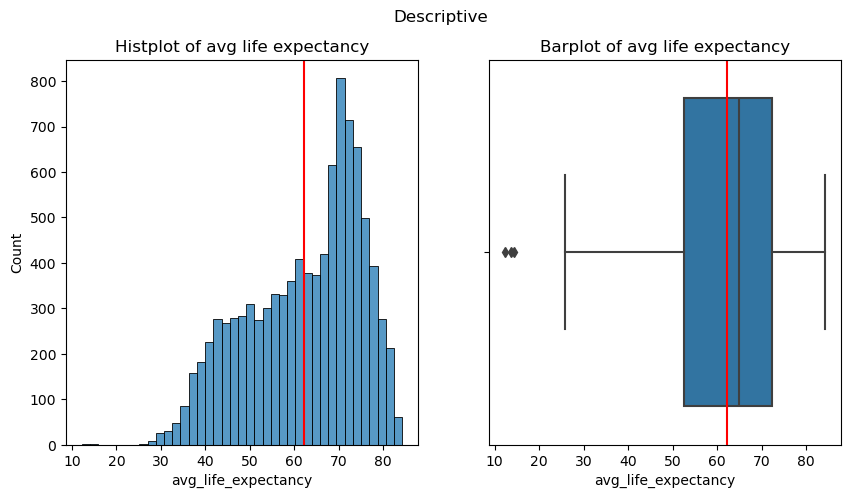

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
x = df_merged['avg_life_expectancy']

fig.suptitle('Descriptive')
sns.histplot(x=x, ax=axes[0])
axes[0].set_title('Histplot of avg life expectancy')
axes[0].axvline(x.mean(), color='r')
sns.boxplot(x=x, ax=axes[1])
axes[1].set_title('Barplot of avg life expectancy')
axes[1].axvline(x.mean(), color='r')
plt.show()

### Determine Yearly Life Expectancy globally

In [51]:
df_merged.tail()

,Country,Country Code,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap,avg_life_expectancy,gdppc
9578,Zimbabwe,ZWE,2014,60.8,56.6,13855758.0,-4.2,58.70,1594.0
9579,Zimbabwe,ZWE,2015,61.6,57.3,14154937.0,-4.3,59.45,1560.0
9580,Zimbabwe,ZWE,2016,62.4,58.0,14452705.0,-4.4,60.20,1534.0
9581,Zimbabwe,ZWE,2017,63.0,58.2,14751101.0,-4.8,60.60,1582.0
9582,Zimbabwe,ZWE,2018,63.6,59.0,15052191.0,-4.6,61.30,1611.0


In [52]:
# group all countries 
data_global_life = df_merged.groupby('Year').agg({'Female Life Expectancy':'mean', 
                                             'Male Life Expectancy':'mean'})

In [53]:
data_global_life.tail()

,Female Life Expectancy,Male Life Expectancy
Year,,
2014,74.248966,69.180690
2015,74.448276,69.403448
2016,74.807586,69.696552
2017,75.015172,69.907586
2018,75.267586,70.128276


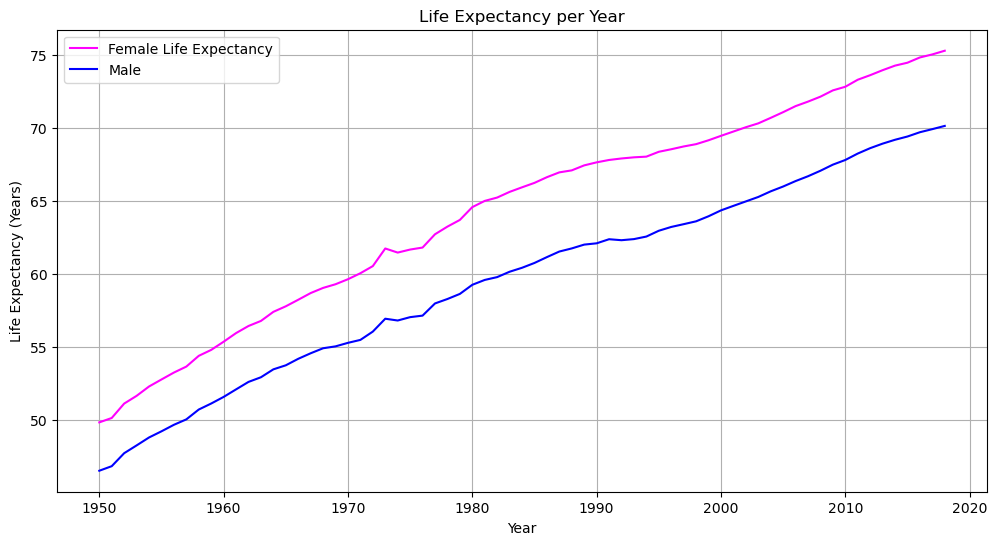

In [54]:
## plot the figure

plt.figure(figsize=(12, 6))
plt.title('Life Expectancy per Year')
plt.plot(data_global_life.index, data_global_life['Female Life Expectancy'],
        label='Female Life Expectancy', color='magenta')
plt.plot(data_global_life.index, data_global_life['Male Life Expectancy'],
        label='Male', color='blue')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Life Expectancy (Years)')
plt.grid(True)
plt.show()

In [55]:
df_merged.head()

,Country,Country Code,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap,avg_life_expectancy,gdppc
0,Afghanistan,AFG,1950,28.4,27.1,7480464.0,-1.3,27.75,1156.0
1,Afghanistan,AFG,1951,28.6,27.4,7571542.0,-1.2,28.00,1170.0
2,Afghanistan,AFG,1952,29.1,27.8,7667534.0,-1.3,28.45,1189.0
3,Afghanistan,AFG,1953,29.6,28.3,7764549.0,-1.3,28.95,1240.0
4,Afghanistan,AFG,1954,29.9,28.6,7864289.0,-1.3,29.25,1245.0


### Interactive Plot of Life Expectancy of top 15 Countries

In [58]:
countries_life_expectancy = df_merged.groupby('Country').agg({'Female Life Expectancy':'mean',
                                                       'Male Life Expectancy':'mean'})

In [59]:
# take the average of the life expectancy of every country from 1950-2020 and take
# the largest 15 average as the top countries with highest life expectancy average.

countries_life_expectancy['Average'] = countries_life_expectancy.mean(axis=1)
top_15 = countries_life_expectancy['Average'].nlargest(15)
top_15

Country
Iceland        77.121739
Sweden         76.935507
Norway         76.675362
Switzerland    76.395652
Netherlands    76.339855
Canada         75.839130
Japan          75.799275
Australia      75.710145
France         75.244928
Israel         75.194928
Spain          75.181159
Italy          75.168841
Denmark        75.135507
Greece         75.059420
New Zealand    75.020290
Name: Average, dtype: float64

In [60]:
# assure that we are working with copy

data_filtered = df_merged[df_merged['Country'].isin(top_15.index)]
data_filtered = data_filtered.copy()

# make a new column of average life expectancy between 2 genders.
data_filtered['avg_life_exp'] = data_filtered.loc[:, ('Female Life Expectancy', 'Male Life Expectancy')].mean(axis=1)
data_filtered

,Country,Country Code,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap,avg_life_expectancy,gdppc,avg_life_exp
385,Australia,AUS,1950,71.7,66.5,8177169.0,-5.2,69.10,11815.0,69.10
386,Australia,AUS,1951,71.6,66.1,8419836.0,-5.5,68.85,11966.0,68.85
387,Australia,AUS,1952,72.0,66.4,8632790.0,-5.6,69.20,11824.0,69.20
388,Australia,AUS,1953,72.6,67.1,8819163.0,-5.5,69.85,11963.0,69.85
389,Australia,AUS,1954,72.8,67.2,9003364.0,-5.6,70.00,12419.0,70.00
...,...,...,...,...,...,...,...,...,...,...
8521,Switzerland,CHE,2014,85.1,80.9,8187792.0,-4.2,83.00,59485.0,83.00
8522,Switzerland,CHE,2015,84.9,80.7,8281735.0,-4.2,82.80,59307.0,82.80
8523,Switzerland,CHE,2016,85.2,81.5,8372902.0,-3.7,83.35,59662.0,83.35
8524,Switzerland,CHE,2017,85.4,81.4,8451688.0,-4.0,83.40,60171.0,83.40


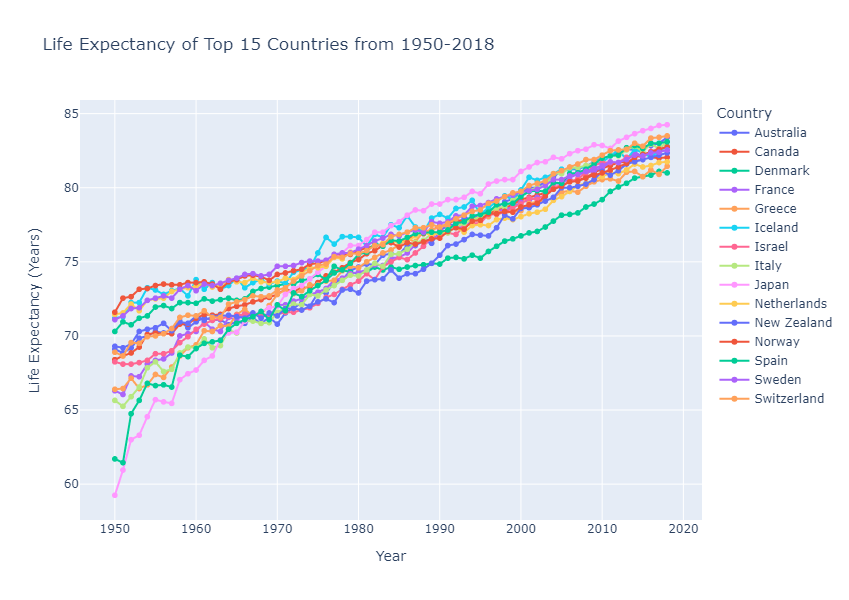

In [62]:
fig = px.line(data_filtered, x='Year', y='avg_life_exp', color='Country',
             title='Life Expectancy of Top 15 Countries from 1950-2018',
             labels={'avg_life_exp':'Life Expectancy (Years)'},
             hover_data=['Country'], markers=True, width=800, height=600)
fig.show()

In [63]:
# Note that I'm aware that not all countries are mentioned in this dataset, since I have to merge the
# gdp dataset and the life expectancy dataset.

In [71]:
correlation_matrix = df_merged.corr(numeric_only=True)

In [74]:
correlation_matrix

,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap,avg_life_expectancy,gdppc
Year,1.000000,0.528871,0.531899,0.076839,-0.228124,0.532131,0.339540
Female Life Expectancy,0.528871,1.000000,0.986390,0.041774,-0.530994,0.996878,0.599464
Male Life Expectancy,0.531899,0.986390,1.000000,0.059093,-0.384437,0.996293,0.611878
Population,0.076839,0.041774,0.059093,1.000000,0.070003,0.050234,-0.021130
Life Expectancy Gap,-0.228124,-0.530994,-0.384437,0.070003,1.000000,-0.462425,-0.212288
avg_life_expectancy,0.532131,0.996878,0.996293,0.050234,-0.462425,1.000000,0.607472
gdppc,0.339540,0.599464,0.611878,-0.021130,-0.212288,0.607472,1.000000


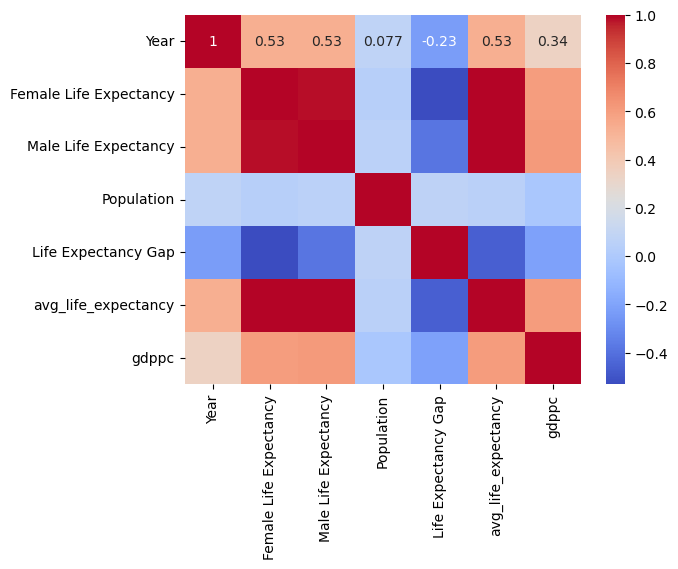

In [73]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

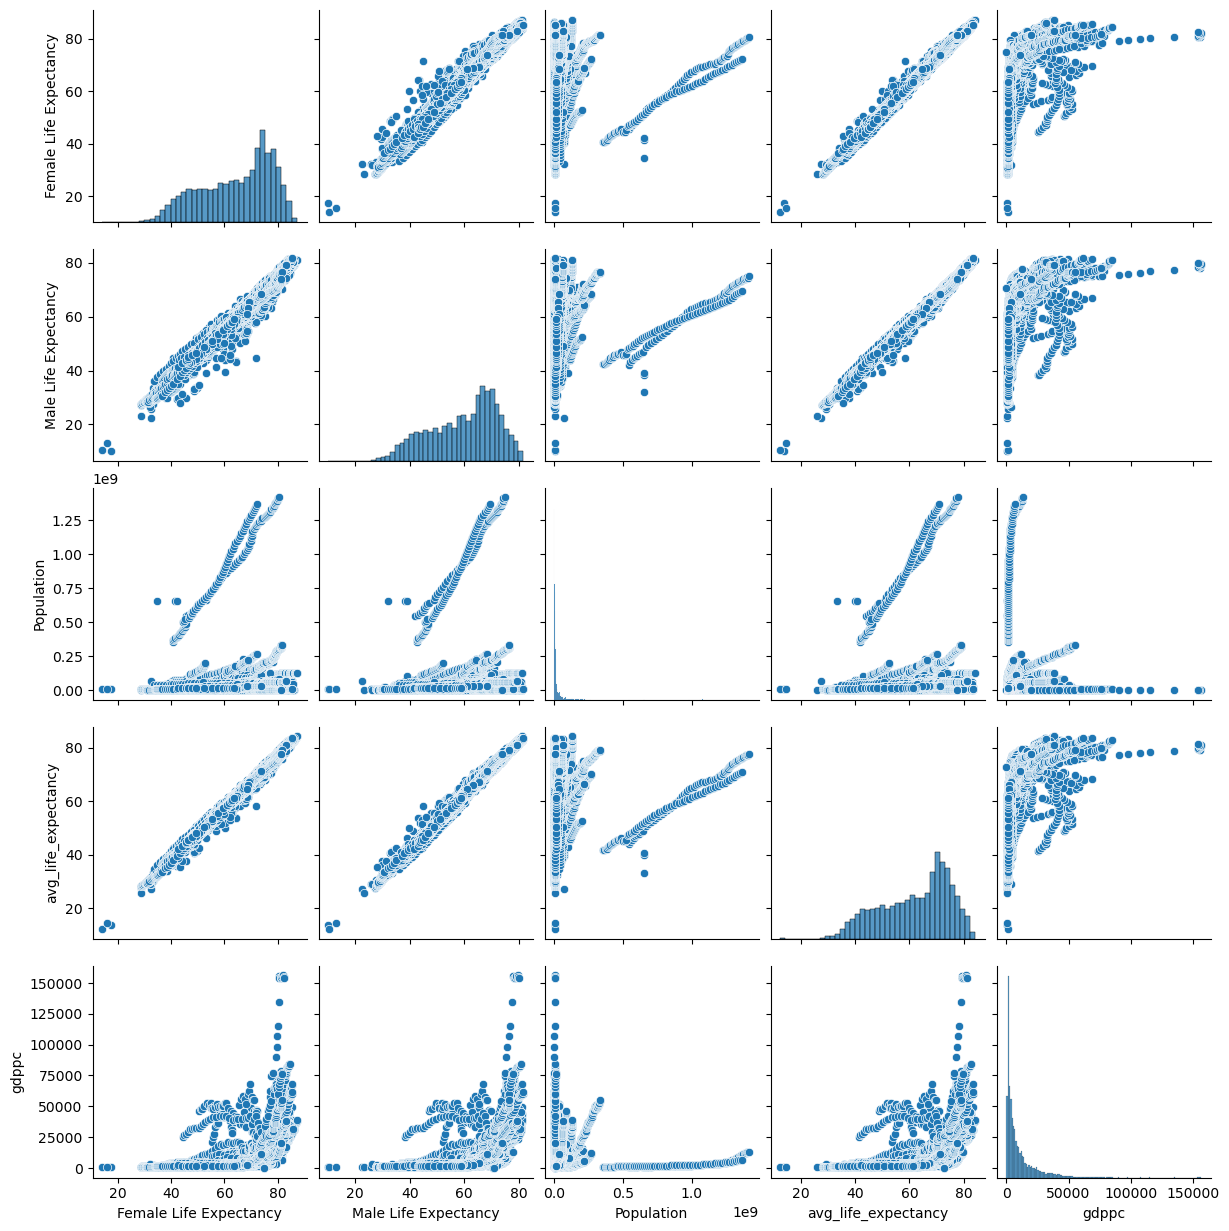

In [70]:
sns.pairplot(df_merged[['Female Life Expectancy', 'Male Life Expectancy', 'Population', 'avg_life_expectancy', 'gdppc']])
plt.show()

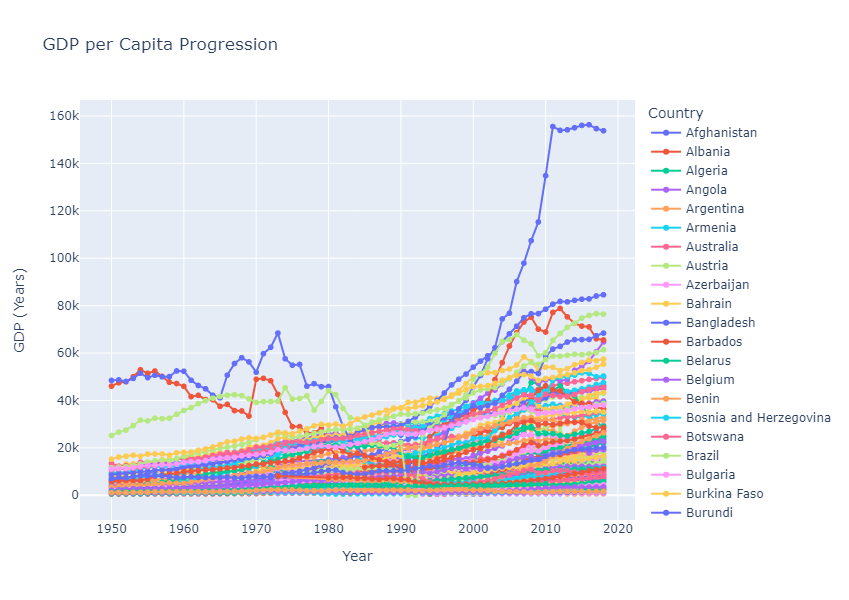

In [76]:
fig = px.line(df_merged, x='Year', y='gdppc', color='Country',
             title='GDP per Capita Progression',
             labels={'gdppc':'GDP (Years)'},
             hover_data=['Country'], markers=True, width=800, height=600)
fig.show()

In [79]:
# Filter the top 15 GDP countries

countries_gdp = df_merged.groupby('Country')['gdppc'].mean()
top_15_gdp = countries_gdp.nlargest(15)

In [80]:
df_filterby_gdp = df_merged.loc[df_merged['Country'].isin(top_15_gdp.index)]

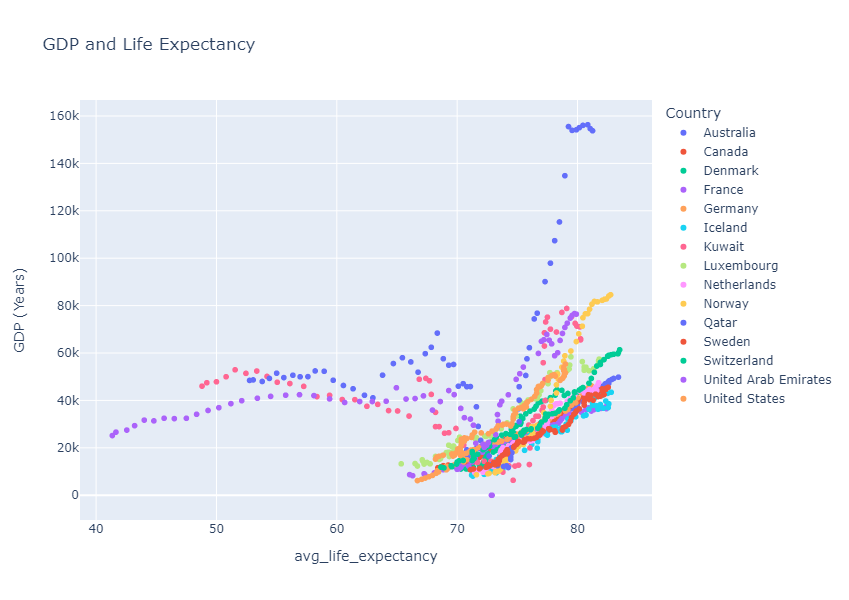

In [88]:
fig = px.scatter(df_filterby_gdp, x='avg_life_expectancy', y='gdppc', color='Country',
             title='GDP and Life Expectancy',
             labels={'gdppc':'GDP (Years)'},
             hover_data=['Country'], width=800, height=600)
fig.show()

### Compare the trends in life expectancy between high-income countries vs low-income countries

## Findings
1. GDP is somehow correlated with life expectancy of a country, the higher the life expectancy, the higher the GDP too
2. Population does not have anything to do with life expectancy.
3. Female life expectancy is shown to be higher than male life expectancy